# Visualización de Densidad: Curvas KDE y Gráficos de Violín

En este notebook exploraremos cómo visualizar la "forma" de los datos más allá de las simples barras. Estas herramientas son vitales en Machine Learning para detectar si nuestros datos están sesgados o si existen grupos ocultos (multimodalidad).

### 1. Preparación del Entorno y Datos
Primero, crearemos un DataFrame que simule datos reales de una empresa tecnológica, incluyendo salarios, edades y niveles de satisfacción.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estética
sns.set_theme(style="whitegrid")
np.random.seed(42)

# Crear datos sintéticos
n = 1000
data = {
    # Distribución Normal (Edad)
    'Edad': np.random.normal(35, 8, n).astype(int),
    
    # Distribución Bimodal (Simulando dos grupos: Juniors y Seniors)
    'Salario_USD': np.concatenate([
        np.random.normal(3000, 500, n//2), 
        np.random.normal(7000, 1000, n//2)
    ]),
    
    # Variable Categórica para comparaciones
    'Departamento': np.random.choice(['Ingeniería', 'Ventas', 'RRHH'], n),
    
    # Satisfacción (Escala 1-10 con sesgo)
    'Satisfaccion': np.random.beta(5, 2, n) * 10
}

df = pd.DataFrame(data)
print("DataFrame independiente creado con éxito.")
display(df.head())

DataFrame independiente creado con éxito.


,Edad,Salario_USD,Departamento,Satisfaccion
0,38,3699.677718,Ventas,9.417251
1,33,3462.316841,RRHH,7.004913
2,40,3029.815185,Ventas,9.778494
3,47,2676.531611,RRHH,6.255232
4,33,3349.111657,RRHH,9.288286


### 2. Curvas de Densidad (KDE - Kernel Density Estimate)

La **Curva de Densidad** es una representación suavizada de un histograma. En lugar de depender de "cajas" (bins), utiliza un kernel (una función matemática) para estimar la probabilidad de que la variable tome un valor determinado.

**Uso en Machine Learning:**
* **Detección de Multimodalidad:** Si ves dos picos, significa que tu variable tiene dos comportamientos distintos. Intentar predecir esto con un modelo simple (como una Regresión Lineal) sin separar los grupos dará errores altos.
* **Análisis de Superposición:** Permite ver cuánto se parecen dos categorías entre sí.

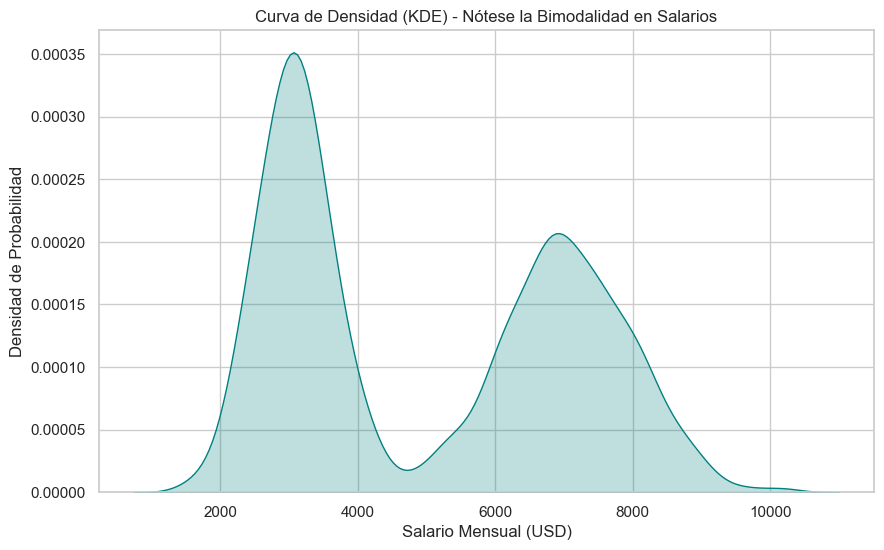

In [2]:
plt.figure(figsize=(10, 6))
# Visualizamos el Salario: notarás dos picos (Junior vs Senior)
sns.kdeplot(data=df, x='Salario_USD', fill=True, color="teal", bw_adjust=0.5)
plt.title('Curva de Densidad (KDE) - Nótese la Bimodalidad en Salarios')
plt.xlabel('Salario Mensual (USD)')
plt.ylabel('Densidad de Probabilidad')
plt.show()

### 3. Gráficos de Violín (Violin Plots)

El **Gráfico de Violín** es el "hijo" del Box-plot y la Curva de Densidad. 

**Cómo leerlo:**
1. **La parte más ancha:** Es donde se concentran la mayoría de los datos (el pico de la densidad).
2. **El punto blanco al centro:** Representa la **Mediana**.
3. **La línea negra gruesa:** Es el **Rango Intercuartílico** (donde está el 50% central de los datos).
4. **Las puntas delgadas:** Indican los valores extremos o colas de la distribución.

**¿Por qué es mejor que un Box-plot?**
Un box-plot puede verse igual para dos distribuciones totalmente distintas (una uniforme y una bimodal). El violín revela la "arquitectura" interna que el box-plot oculta.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_1400\3579525912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Departamento', y='Satisfaccion', palette="muted", inner="box")


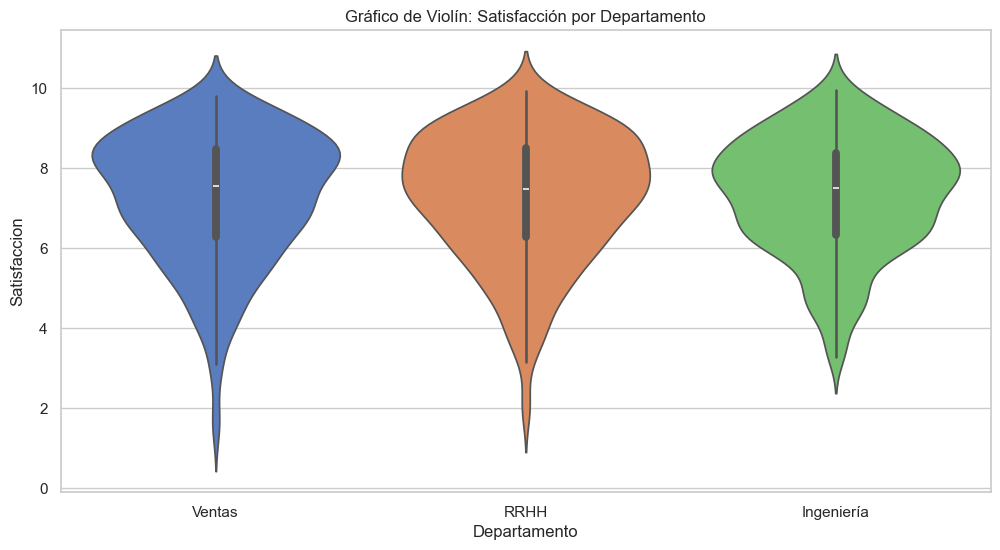

In [3]:
plt.figure(figsize=(12, 6))
# Comparamos la Satisfacción por Departamento
sns.violinplot(data=df, x='Departamento', y='Satisfaccion', palette="muted", inner="box")
plt.title('Gráfico de Violín: Satisfacción por Departamento')
plt.show()

### 4. Resumen para tu Modelo de ML

* **Si el violín es simétrico y "panzón" en el medio:** Tus datos son normales. Puedes usar algoritmos paramétricos con confianza.
* **Si el violín tiene dos "panzas" (Bimodal):** Considera crear una variable binaria (0 y 1) para identificar esos dos grupos antes de entrenar tu modelo.
* **Si el violín es muy largo y delgado arriba:** Tienes muchos outliers o un sesgo positivo fuerte. ¡Es hora de revisar la sección de **Skewness** y considerar una transformación logarítmica!